{0: array([-0.14417977,  0.43790407]), 1: array([0.14444153, 0.35634827]), 2: array([0.02484568, 0.03714434]), 3: array([0.02428807, 0.47360772]), 4: array([-0.48851016,  0.64661087]), 5: array([-0.65886253,  0.68578892]), 6: array([-0.67345493,  0.54545075]), 7: array([-0.04205614,  0.35592019]), 8: array([-0.08820891, -0.07607825]), 9: array([-0.24876675, -0.24526438]), 10: array([-0.46437109,  0.80336929]), 11: array([-0.23080547,  0.94843488]), 12: array([-0.05808642,  0.80180996]), 13: array([0.00297847, 0.16604536]), 14: array([ 0.19203896, -0.79567393]), 15: array([-0.06299971, -0.77216692]), 16: array([-1.        ,  0.64362917]), 17: array([0.25128452, 0.65400459]), 18: array([-0.17818976, -0.70571425]), 19: array([0.17934053, 0.13623543]), 20: array([-0.23997405, -0.57530606]), 21: array([0.11782993, 0.72799119]), 22: array([ 0.05545641, -0.81820262]), 23: array([ 0.35192291, -0.65156038]), 24: array([ 0.68920457, -0.43709569]), 25: array([ 0.62183582, -0.60231956]), 26: array

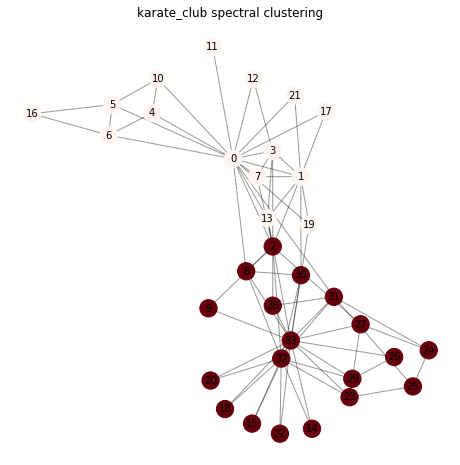

In [8]:
#coding=utf-8
#MSC means Multiple Spectral Clustering 
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import networkx as nx
import matplotlib.pyplot as plt
 
def getNormLaplacian(W):
	"""input matrix W=(w_ij)
	"compute D=diag(d1,...dn)
	"and L=D-W
	"and Lbar=D^(-1/2)LD^(-1/2)
	"return Lbar
	"""
	d=[np.sum(row) for row in W]
	D=np.diag(d)
	L=D-W
	#Dn=D^(-1/2)
	Dn=np.power(np.linalg.matrix_power(D,-1),0.5)
	Lbar=np.dot(np.dot(Dn,L),Dn)
	return Lbar
 
def getKSmallestEigVec(Lbar,k):
	"""input
	"matrix Lbar and k
	"return
	"k smallest eigen values and their corresponding eigen vectors
	"""
	eigval,eigvec=linalg.eig(Lbar)
	dim=len(eigval)
 
	#查找前k小的eigval
	dictEigval=dict(zip(eigval,range(0,dim)))
	kEig=np.sort(eigval)[0:k]
	ix=[dictEigval[k] for k in kEig]
	return eigval[ix],eigvec[:,ix]
 
def checkResult(Lbar,eigvec,eigval,k):
	"""
	"input
	"matrix Lbar and k eig values and k eig vectors
	"print norm(Lbar*eigvec[:,i]-lamda[i]*eigvec[:,i])
	"""
	check=[np.dot(Lbar,eigvec[:,i])-eigval[i]*eigvec[:,i] for i in range(0,k)]
	length=[np.linalg.norm(e) for e in check]/np.spacing(1)
	print("Lbar*v-lamda*v are %s*%s" % (length,np.spacing(1)))
 
g=nx.karate_club_graph()
nodeNum=len(g.nodes())
m=nx.to_numpy_matrix(g)
Lbar=getNormLaplacian(m)
k=2
kEigVal,kEigVec=getKSmallestEigVec(Lbar,k)
 
#跳过k means，用最简单的符号判别的方法来求点的归属
 
clusterA=[i for i in range(0,nodeNum) if kEigVec[i,1]>0]
clusterB=[i for i in range(0,nodeNum) if kEigVec[i,1]<0]
 
#draw graph
colList=dict.fromkeys(g.nodes())
for node,score in colList.items():
	if node in clusterA:
		colList[node]=0
	else:
		colList[node]=0.6
plt.figure(figsize=(8,8))
pos=nx.spring_layout(g)
nx.draw_networkx_edges(g,pos,alpha=0.4)
nx.draw_networkx_nodes(g,pos,nodelist=colList.keys(),
		node_color=list(colList.values()),
		cmap=plt.cm.Reds_r)
nx.draw_networkx_labels(g,pos,font_size=10,font_family='sans-serif')
plt.axis('off')
plt.title("karate_club spectral clustering")
plt.savefig("spectral_clustering_result.png")
plt.show()

In [9]:
pos

{0: array([-0.14417977,  0.43790407]),
 1: array([0.14444153, 0.35634827]),
 2: array([0.02484568, 0.03714434]),
 3: array([0.02428807, 0.47360772]),
 4: array([-0.48851016,  0.64661087]),
 5: array([-0.65886253,  0.68578892]),
 6: array([-0.67345493,  0.54545075]),
 7: array([-0.04205614,  0.35592019]),
 8: array([-0.08820891, -0.07607825]),
 9: array([-0.24876675, -0.24526438]),
 10: array([-0.46437109,  0.80336929]),
 11: array([-0.23080547,  0.94843488]),
 12: array([-0.05808642,  0.80180996]),
 13: array([0.00297847, 0.16604536]),
 14: array([ 0.19203896, -0.79567393]),
 15: array([-0.06299971, -0.77216692]),
 16: array([-1.        ,  0.64362917]),
 17: array([0.25128452, 0.65400459]),
 18: array([-0.17818976, -0.70571425]),
 19: array([0.17934053, 0.13623543]),
 20: array([-0.23997405, -0.57530606]),
 21: array([0.11782993, 0.72799119]),
 22: array([ 0.05545641, -0.81820262]),
 23: array([ 0.35192291, -0.65156038]),
 24: array([ 0.68920457, -0.43709569]),
 25: array([ 0.62183582,